# Data Cleaning

## Goals

- Examine data for potential issues
- Identify and fill in missing values
- Identify and correct incorrect values
- Remove low variance columns
- Identify potential outliers
- Correct incorrect data types
- Remove special characters and clean categorical variables
- Identify and remove duplicate records

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../../week_5/pandas_import_export/data/vehicles_messy.csv')

data.head()

/home/ubuntu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.964545,0.0,0.0,0.0,10,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.347895,0.0,0.0,0.0,17,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


## Null Values

In [3]:
data.isnull()

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37838,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37839,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37840,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False
37841,False,False,False,False,False,False,False,False,False,False,...,True,True,False,True,False,False,True,False,False,False


In [6]:
data.isnull().sum()

barrels08         0
barrelsA08        0
charge120         0
charge240         0
city08            0
              ...  
modifiedOn        0
startStop     31705
phevCity          0
phevHwy           0
phevComb          0
Length: 83, dtype: int64

In [7]:
data.isnull().sum() > 0

barrels08     False
barrelsA08    False
charge120     False
charge240     False
city08        False
              ...  
modifiedOn    False
startStop      True
phevCity      False
phevHwy       False
phevComb      False
Length: 83, dtype: bool

In [8]:
null_cols = data.isnull().sum()

null_cols[null_cols > 0]

cylinders       123
displ           120
drive          1189
eng_dscr      15403
trany            11
guzzler       35562
trans_dscr    22796
tCharger      32657
sCharger      37177
atvType       34771
fuelType2     36435
rangeA        36440
evMotor       37281
mfrCode       30818
c240Dscr      37806
c240bDscr     37807
startStop     31705
dtype: int64

In [9]:
null_cols[null_cols > 0] / len(data) * 100

cylinders      0.325027
displ          0.317100
drive          3.141928
eng_dscr      40.702376
trany          0.029067
guzzler       93.972465
trans_dscr    60.238353
tCharger      86.296012
sCharger      98.240097
atvType       91.882250
fuelType2     96.279365
rangeA        96.292577
evMotor       98.514917
mfrCode       81.436461
c240Dscr      99.902228
c240bDscr     99.904870
startStop     83.780356
dtype: float64

In [10]:
!pip install missingno

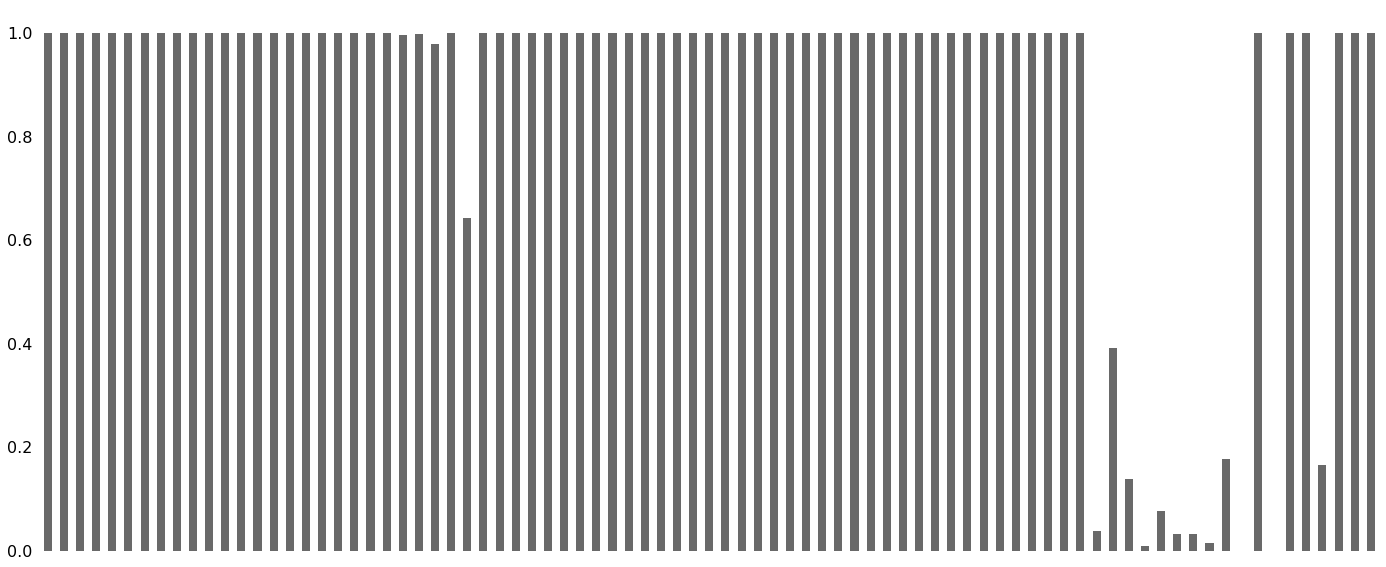

In [11]:
import missingno

%matplotlib inline

# it is necessary to sample data since otherwise the plot would be over-populated 
sample_data = data.sample(500, random_state=42)
missingno.bar(sample_data);

Summary:

- each column represents a dataframe column
- the smaller the bar the more null values in the column

In [12]:
len(sample_data.columns)

83

In [13]:
sample_data.iloc[:,0].isnull().sum()

0

In [14]:
sample_data.iloc[:,78].isnull().sum()

0

In [15]:
sample_data.iloc[:,76].isnull().sum()

500

In [16]:
threshold = 40

null_cols = null_cols[null_cols > 0] / len(data) * 100
null_filter = null_cols > threshold

drop_cols = list(null_cols[null_filter].index)

drop_cols

['eng_dscr',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'startStop']

### Different ways of drop null columns

In [17]:
# read data again each time to recover original dataset
data = pd.read_csv('../../week_5/pandas_import_export/data/vehicles_messy.csv')

/home/ubuntu/.local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [18]:
# First approach
data_1 = data[[x for x in data.columns if x not in drop_cols]]

len(data_1.columns)

70

In [19]:
# Second approach
data_2 = data.drop(drop_cols, axis=1)

len(data_2.columns)

70

In [20]:
# Third approach
data.drop(drop_cols, axis=1, inplace=True)

len(data.columns)

70

### Fill null values

Techniques to fill null values:

- 0s
- Mean, Median, Mode
- predictive methods

In [ ]:
null_displ = data[data['displ'].isnull()]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

In [ ]:
# as expected electric cars do not have cylinders nor displacement
data[['displ', 'cylinders']] = data[['displ', 'cylinders']].fillna(0)

In [ ]:
null_displ = data[data['displ'].isnull()]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

In [ ]:
null_displ = data[data['displ'] == 0]
null_displ = null_displ[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]
null_displ

## Incorrect Values

In [ ]:
test = data[(data['cylinders']==0) & (data['displ']!=0)]
test[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']]

To fill this cylinders value, we could ask an expert or fill with similar values encountered on the dataset

In [ ]:
# example on how to fill a value: loc[condition, column]
data.loc[(data['cylinders']==0) & (data['displ']!=0), 'cylinders'] = 4

In [ ]:
data[['year', 'make', 'model', 'trany', 'drive','fuelType','cylinders', 'displ']].iloc[21506]

## Low Variance Columns